#                                                          Projet : Analyse de donnees

## API OECD

### 1. Documentation sur l’API de l’OCDE


### Définition de l’API
#### L’API de l’OCDE est une interface RESTful basée sur le standard SDMX (Statistical Data and Metadata Exchange). Elle fournit un accès programmatique aux données économiques, sociales et environnementales collectées par l’OCDE. Les données peuvent être requêtées et récupérées dans des formats standardisés tels que JSON, XML et CSV.

### Fonctionnalités principales
#### Accès dynamique aux données : Permet de récupérer des ensembles de données à jour à travers des requêtes personnalisées.
#### Standard SDMX : Offre une structure cohérente et normalisée pour les données statistiques, facilitant leur exploitation pour des analyses avancées.
#### Support multiformat : Les réponses peuvent être adaptées en fonction des besoins (JSON, XML, CSV).
#### Filtres et métadonnées : Les utilisateurs peuvent filtrer les données par dimensions (pays, années, indicateurs) et accéder aux métadonnées structurées.

### 2. Relation entre l’API de l’OCDE et l’analyse de données

#### L’API de l’OCDE est un outil puissant pour l’analyse de données car elle offre :

#### Accès à des données fiables et actualisées : Les données économiques et sociales de l’OCDE sont reconnues pour leur qualité et leur standardisation.
#### Enrichissement des modèles prédictifs : Les données de l’OCDE peuvent être intégrées dans des modèles de classification ou de clustering, notamment pour des analyses sectorielles ou géographiques.

### 3. Justification du choix de l’API de l’OCDE

#### Richesse des données : L’OCDE couvre un large éventail de domaines, allant de l’économie à l’éducation, en passant par l’environnement, ce qui offre une grande flexibilité pour divers projets d’analyse.
#### Fiabilité : Les données sont collectées par une organisation internationale reconnue et suivent des standards rigoureux.
#### Facilité d’utilisation : Grâce au support RESTful et aux formats standardisés (JSON, CSV), il est facile d’intégrer ces données dans des outils analytiques modernes comme Python (pandas), R, ou encore Excel.
#### Adapté aux analyses avancées : La structure SDMX facilite l’organisation et l’extraction des données nécessaires pour des analyses statistiques, prédictives ou exploratoires.
#### Dynamique et à jour : L’API permet d’obtenir des données mises à jour en temps réel, évitant ainsi les erreurs liées à des datasets obsolètes.

### Récupération de contenu via le générateur de requêtes API
#### Sélectionnez les données dont vous avez besoin dans l'Explorateur des données de l'OCDE, puis cliquez sur l'icône API pour développeur située au-dessus du tableau de données. Cela affichera les requêtes API pour les Données ainsi que pour leur Structure.

#### Pour les utiliser, cliquez simplement sur Copier le code et incluez la syntaxe dans vos appels API.

#### La Requête des données récupère les données réelles de l'ensemble de données, tandis que la Requête de la structure fournit des détails descriptifs, tels que les dimensions et les attributs de l'ensemble de données, également appelés métadonnées structurelles. 

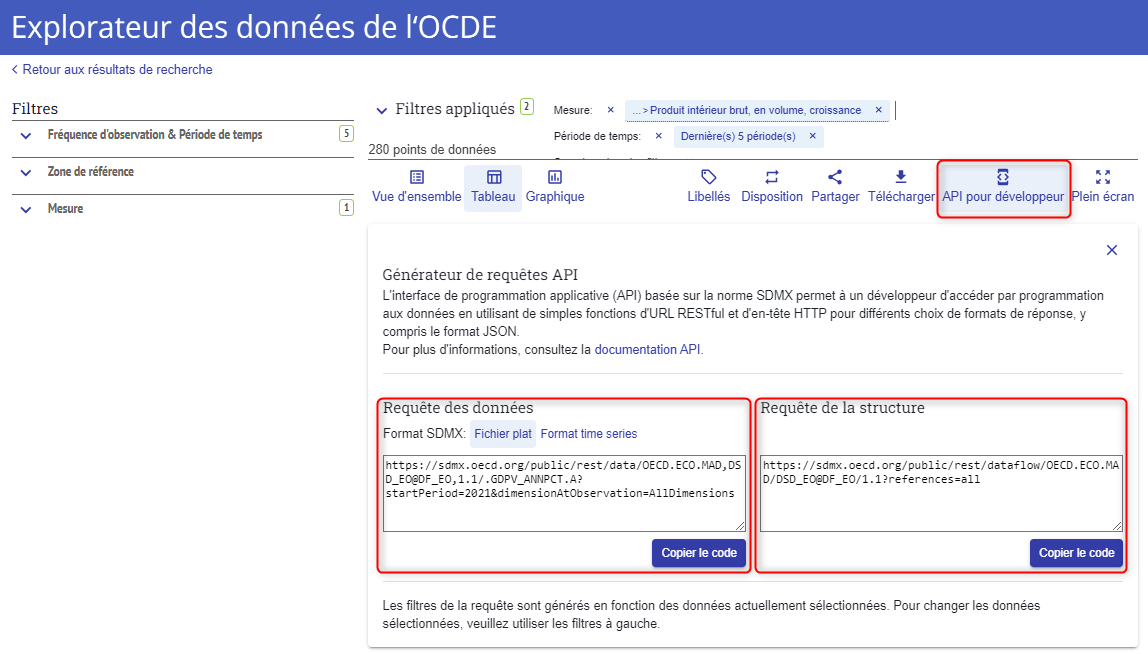

In [20]:
from IPython.display import Image

# Remplacez le chemin de l'image par le chemin absolu ou relatif vers votre image
Image(filename='fr-api.png')


### Syntaxe de la requête de données de l'API
#### La requête de données de l'API est une URL composée des éléments suivants :

##### {URL de l’hôte}/{Identifiant de l’agence},{Identifiant du jeu de données},{Version du jeu de données}/{Sélection des données}?{autres paramètres optionnels}

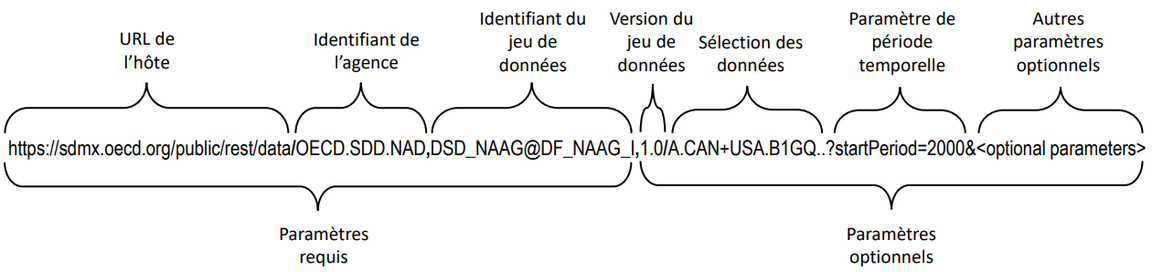

In [21]:
Image(filename='api.png')

### Exemple Python : télécharger des données CSV depuis l'API
#### Cet exemple montre comment télécharger et lire un fichier CSV en tant que DataFrame en Python, y compris les étiquettes et les identifiants de séries, directement depuis une API.

#### import pandas as pd

#### url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_CLI/.M.LI...AA...H?startPeriod=2023-02&dimensionAtObservation=AllDimensions&format=csvfilewithlabels' df = pd.read_csv(url) 

In [12]:
import pandas as pd
import requests as rq

# URL de téléchargement des données
url = 'https://sdmx.oecd.org/archive/rest/data/OECD,DF_SOCX_REF,/.BEL+AUS?startPeriod=2017&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'

# Requête pour récupérer les données
response = rq.get(url)

# Vérification du statut de la requête
if response.status_code == 200:
    # Conversion des données en DataFrame
    from io import StringIO
    df = pd.read_csv(StringIO(response.text))
    print(df.head())  # Affichage des premières lignes
else:
    print(f"Erreur lors du téléchargement des données : {response.status_code}")


  STRUCTURE           STRUCTURE_ID                         STRUCTURE_NAME  \
0  DATAFLOW  OECD:DF_SOCX_REF(1.0)  Social Expenditure - Reference series   
1  DATAFLOW  OECD:DF_SOCX_REF(1.0)  Social Expenditure - Reference series   
2  DATAFLOW  OECD:DF_SOCX_REF(1.0)  Social Expenditure - Reference series   
3  DATAFLOW  OECD:DF_SOCX_REF(1.0)  Social Expenditure - Reference series   
4  DATAFLOW  OECD:DF_SOCX_REF(1.0)  Social Expenditure - Reference series   

  ACTION VARIABLE                                           Variable COUNTRY  \
0      I      GOV  Total general government expenditure at curren...     AUS   
1      I     GDPV             Gross Domestic Product, at 2015 prices     AUS   
2      I     GDPV             Gross Domestic Product, at 2015 prices     AUS   
3      I     GDPV             Gross Domestic Product, at 2015 prices     AUS   
4      I     GDPV             Gross Domestic Product, at 2015 prices     AUS   

     Country  TIME_PERIOD  Year    OBS_VALUE  Observatio

In [2]:
import requests as rq
import pandas as pd

# URL de téléchargement des données
url = 'https://sdmx.oecd.org/archive/rest/data/OECD,DF_SOCX_REF,/.BEL+AUS?startPeriod=2017&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'

# Requête pour récupérer les données
response = rq.get(url)

# Vérification du statut de la requête
if response.status_code == 200:
    # Sauvegarder les données dans un fichier CSV
    with open('oecd_data.csv', 'w', encoding='utf-8') as file:
        file.write(response.text)

    # Charger le CSV dans un DataFrame
    df = pd.read_csv('oecd_data.csv', delimiter=';')

    # Afficher les premières lignes pour vérification
    df
else:
    print(f"Erreur lors du téléchargement des données : {response.status_code}")

,"STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,VARIABLE,Variable,COUNTRY,Country,TIME_PERIOD,Year,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period"
0,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
1,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
2,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
3,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
4,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
...,...
65,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
66,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
67,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."
68,"DATAFLOW,OECD:DF_SOCX_REF(1.0),Social Expendit..."


## Problématiques et Questionnements


### Quel est l'impact de la pollution de l'air (PM2.5) sur la mortalité due aux maladies respiratoires ?
### Existe-t-il une relation significative entre les concentrations de PM2.5 et les taux de mortalité ?
### Quels sont les facteurs explicatifs majeurs de la mortalité due aux maladies respiratoires, en dehors de la pollution ?

## Partie 1 : Régression linéaire simple

## Étape 1 : Préparation des Données

Cet ensemble de données fournit des statistiques sur la santé dans les régions. Les indicateurs comprennent  l'état de santé (espérance de vie, taux de mortalité infantile, taux brut de mortalité, taux de mortalité ajusté selon l'âge) et les risques pour la santé (obésité, mortalité due aux maladies circulatoires et respiratoires, pollution de l'air PM2.5).

In [15]:
import pandas as pd
import requests
import io  # Import pour StringIO
# URL cible
url = f"https://sdmx.oecd.org/public/rest/data/OECD.CFE.EDS,DSD_REG_HEALTH@DF_HEALTH,2.0/A..DE1+DE111+DE112+DE113+DE114+DE115+DE116+DE117+DE118+DE119+DE11A+DE11B+DE11C+DE11D+DE121+DE122+DE123+DE124+DE125+DE126+DE127+DE128+DE129+DE12A+DE12B+DE12C+DE131+DE132+DE133+DE134+DE135+DE136+DE137+DE138+DE139+DE13A+DE141+DE142+DE143+DE144+DE145+DE146+DE147+DE148+DE149+DE2+DE211+DE212+DE213+DE214+DE215+DE216+DE217+DE218+DE219+DE21A+DE21B+DE21C+DE21D+DE21E+DE21F+DE21G+DE21H+DE21I+DE21J+DE21K+DE21L+DE21M+DE21N+DE221+DE222+DE223+DE224+DE225+DE226+DE227+DE228+DE229+DE22A+DE22B+DE22C+DE231+DE232+DE233+DE234+DE235+DE236+DE237+DE238+DE239+DE23A+DE241+DE242+DE243+DE244+DE245+DE246+DE247+DE248+DE249+DE24A+DE24B+DE24C+DE24D+DE251+DE252+DE253+DE254+DE255+DE256+DE257+DE258+DE259+DE25A+DE25B+DE25C+DE261+DE262+DE263+DE264+DE265+DE266+DE267+DE268+DE269+DE26A+DE26B+DE26C+DE271+DE272+DE273+DE274+DE275+DE276+DE277+DE278+DE279+DE27A+DE27B+DE27C+DE27D+DE27E+DE6+DE600+DEF+DEF01+DEF02+DEF03+DEF04+DEF05+DEF06+DEF07+DEF08+DEF09+DEF0A+DEF0B+DEF0C+DEF0D+DEF0E+DEF0F+BE1+BE100+BE2+BE211+BE212+BE213+BE223+BE231+BE232+BE233+BE234+BE235+BE236+BE241+BE242+BE251+BE252+BE253+BE254+BE255+BE256+BE257+BE258+CA13+CA1309+CA1314+CA1315+CA1306+CA1307+CA1308+CA1301+CA1302+CA1305+CA1303+CA1304+CA1310+CA1311+CA1312+CA1313+CA24+CA2401+CA2402+CA2403+CA2404+CA2405+CA2406+CA2407+CA2408+CA2409+CA2410+CA2411+CA2412+CA2413+CA2414+CA2415+CA2416+CA2420+CA2421+CA2422+CA2423+CA2434+CA2417+CA2418+CA2419+CA2425+CA2426+CA2427+CA2428+CA2429+CA2431+CA2433+CA2430+CA2440+CA2441+CA2442+CA2443+CA2444+CA2445+CA2432+CA2438+CA2439+CA2449+CA2450+CA2446+CA2447+CA2448+CA2453+CA2454+CA2455+CA2456+CA2457+CA2458+CA2459+CA2467+CA2468+CA2469+CA2470+CA2471+CA2466+CA2465+CA2452+CA2460+CA2461+CA2462+CA2463+CA2464+CA2472+CA2473+CA2474+CA2475+CA2476+CA2477+CA2478+CA2479+CA2480+CA2481+CA2482+CA2483+CA2484+CA2485+CA2486+CA2487+CA2488+CA2489+CA2435+CA2436+CA2437+CA2451+CA2490+CA2491+CA2492+CA2493+CA2494+CA2495+CA2496+CA2497+CA2498+CA2499+AUS+AU1+AU2+AU3+AU4+AU5+AU6+AU7+AU8+AUT+AT11+AT111+AT112+AT113+AT12+AT121+AT122+AT123+AT124+AT125+AT126+AT127+AT13+AT130+AT21+AT211+AT212+AT213+AT22+AT221+AT222+AT223+AT224+AT225+AT226+AT31+AT311+AT312+AT313+AT314+AT315+AT32+AT321+AT322+AT323+AT33+AT331+AT332+AT333+AT334+AT335+AT34+AT341+AT342..MORT_ICDJ_CRUDE_RATIO+PM25_POP_EXP...?startPeriod=2018&endPeriod=2018&dimensionAtObservation=AllDimensions"
# Ajouter un User-Agent pour simuler un navigateur
headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 


# Faire la requête GET
download = requests.get(url=url, headers=headers)

# Vérifier si la requête a réussi
if download.status_code == 200:
    # Lire le contenu CSV en DataFrame
    dfpol = pd.read_csv(io.StringIO(download.text))
    dfpol  # Afficher les premières lignes
else:
    print(f"Erreur: {download.status_code} - {download.reason}")

dfpol

,DATAFLOW,FREQ,TERRITORIAL_LEVEL,REF_AREA,TERRITORIAL_TYPE,MEASURE,AGE,SEX,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,COUNTRY,OBS_STATUS,UNIT_MULT,DECIMALS
0,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,CA2438,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,6.9,CAN,A,0,1
1,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,DE251,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,12.3,DEU,A,0,1
2,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,CA2457,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,7.5,CAN,A,0,1
3,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,DE135,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,9.9,DEU,A,0,1
4,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,AT213,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,12.7,AUT,A,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL2,DE1,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,11.2,DEU,A,0,1
404,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,AT315,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,11.1,AUT,A,0,1
405,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,CA1309,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,5.1,CAN,A,0,1
406,OECD.CFE.EDS:DSD_REG_HEALTH@DF_HEALTH(2.0),A,TL3,AT331,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,7.1,AUT,A,0,1


## Étape 2 : Sélection des variables

In [16]:
# Step 1: Select relevant columns
columns_to_keep = ['REF_AREA','COUNTRY', 'MEASURE', 'TIME_PERIOD', 'OBS_VALUE']
df2_cleaned = dfpol[columns_to_keep]
df2_cleaned

,REF_AREA,COUNTRY,MEASURE,TIME_PERIOD,OBS_VALUE
0,CA2438,CAN,PM25_POP_EXP,2018,6.9
1,DE251,DEU,PM25_POP_EXP,2018,12.3
2,CA2457,CAN,PM25_POP_EXP,2018,7.5
3,DE135,DEU,PM25_POP_EXP,2018,9.9
4,AT213,AUT,PM25_POP_EXP,2018,12.7
...,...,...,...,...,...
403,DE1,DEU,PM25_POP_EXP,2018,11.2
404,AT315,AUT,PM25_POP_EXP,2018,11.1
405,CA1309,CAN,PM25_POP_EXP,2018,5.1
406,AT331,AUT,PM25_POP_EXP,2018,7.1


In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

Définir les variables 'mortalité due aux maladies respiratoires' et 'pollution de l'air PM2.5' comme variables indépendante (X) et dépendante (y).

In [18]:
import pandas as pd
import statsmodels.api as sm

# Filtrer les données pour chaque mesure
pm25_data = df2_cleaned[df2_cleaned['MEASURE'] == 'PM25_POP_EXP'][['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]
mortality_data = df2_cleaned[df2_cleaned['MEASURE'] == 'MORT_ICDJ_CRUDE_RATIO'][['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]

# Renommer les colonnes pour éviter les confusions
pm25_data = pm25_data.rename(columns={'OBS_VALUE': 'PM25_POP_EXP'})
mortality_data = mortality_data.rename(columns={'OBS_VALUE': 'MORT_ICDJ_CRUDE_RATIO'})

# Fusionner les deux datasets sur REF_AREA et TIME_PERIOD
merged_data = pd.merge(pm25_data, mortality_data, on=['REF_AREA', 'TIME_PERIOD'])

# Définir X (indépendante) et y (dépendante)
X = merged_data['PM25_POP_EXP']
y = merged_data['MORT_ICDJ_CRUDE_RATIO']

# Ajouter une constante pour le modèle
X = sm.add_constant(X)


# Rename columns for clarity
merged_data = merged_data.rename(columns={
    'REF_AREA': 'Region',
    'PM25_POP_EXP': 'PM2_5_Concentration',
    'TIME_PERIOD': 'Year',
    'MORT_ICDJ_CRUDE_RATIO':'Mort_Maladies_Respiratoires'
})

# Vérifier les données prêtes pour la régression
merged_data


,Region,Year,PM2_5_Concentration,Mort_Maladies_Respiratoires
0,AT213,2018,12.7,76.89
1,CA24,2018,7.3,92.00
2,AT335,2018,10.3,50.33
3,AT313,2018,10.9,64.15
4,AU4,2018,6.7,46.20
5,AT121,2018,12.1,59.28
6,AU8,2018,7.0,44.50
7,BE1,2018,14.3,85.51
8,AT123,2018,12.9,70.30
9,AU6,2018,7.3,48.50


## Étape 3 : Nuage de points

Un nuage de points est créé pour visualiser la relation entre mortalité due aux maladies respiratoires et les pollution de l'air PM2.5 . Le nuage de points est affiché avec des axes et une légende.

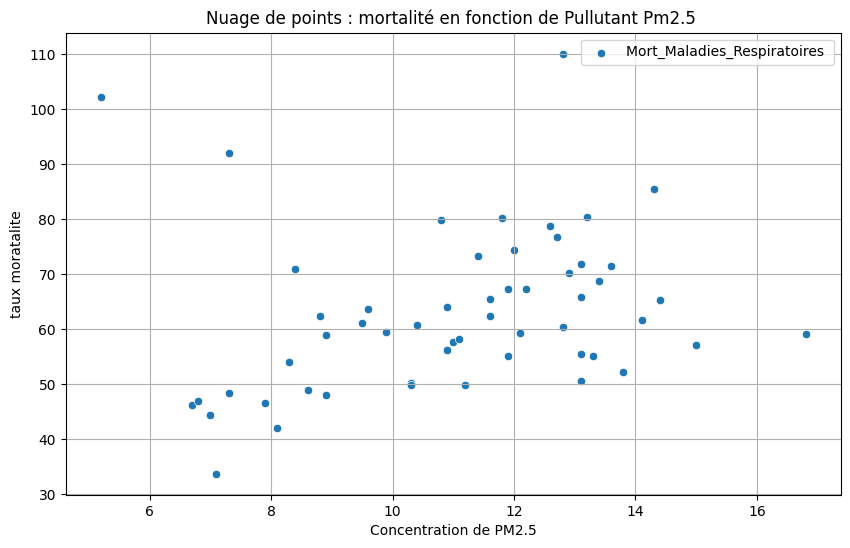

In [19]:
# Creer un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2_5_Concentration', y='Mort_Maladies_Respiratoires', data=merged_data)

# Ajouter des titres et des labels
plt.title('Nuage de points : mortalité en fonction de Pullutant Pm2.5 ')
plt.xlabel('Concentration de PM2.5')
plt.ylabel('taux moratalite')
plt.legend(['Mort_Maladies_Respiratoires '])
plt.grid(True)

# Afficher le graphique
plt.show()

# Interpretation:

Le nuage de points montre une relation positive entre la concentration de PM2.5 et la mortalité due aux maladies respiratoires. Cela signifie que, dans l'ensemble, à mesure que la concentration de PM2.5 augmente, le taux de mortalité lié aux maladies respiratoires tend également à augmenter.
Il y a une certaine dispersion des points autour de la tendance générale, ce qui suggère qu'il y a d'autres facteurs qui peuvent influencer la mortalité due aux maladies respiratoires

## Étape 4 : Ajustement du modèle de régression linéaire

In [20]:
# creation d'un modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

## Étape 5 : Affichage du nuage de points avec la droite de régression

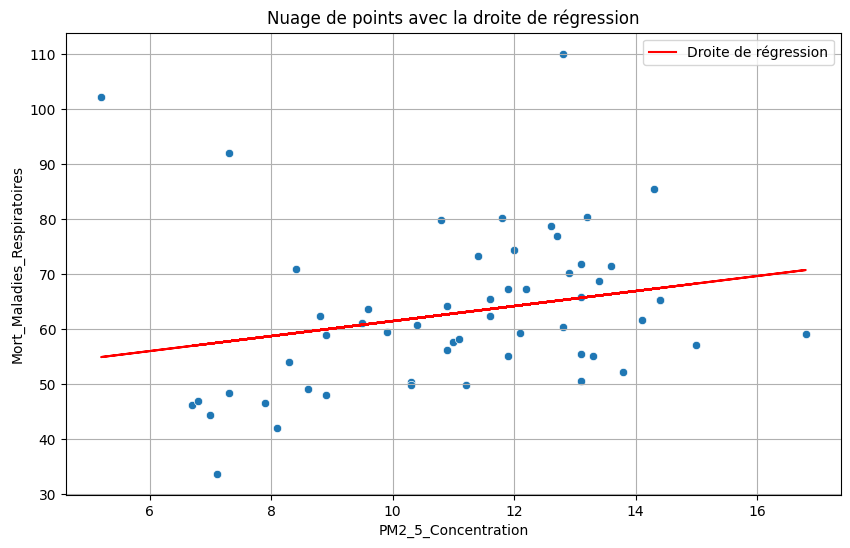

In [21]:
# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2_5_Concentration', y='Mort_Maladies_Respiratoires', data=merged_data)
plt.plot(merged_data['PM2_5_Concentration'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de régression')
plt.xlabel('PM2_5_Concentration')
plt.ylabel('Mort_Maladies_Respiratoires')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Interpretation:

L'ajout d'une droite de régression au nuage de points permet de visualiser la relation linéaire entre la mortalité due aux maladies respiratoires et pollution de l'air PM2.5.
La droite de régression représente la meilleure approximation linéaire des données, en minimisant la distance entre les points et la droite.

## Étape 6 : Tests de régression

In [22]:
# Test de Durbin-Watson (INDÉPENDANCE DES ERREURS ) 
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')



Test de Durbin-Watson: 2.0938106897593083


Cela signifie que les résidus (ou erreurs) du modèle ne montrent pas de tendance séquentielle, confirmant que l'hypothèse d'indépendance des erreurs est raisonnablement respectée. Cela renforce la validité de notre modèle pour interpréter la relation entre la pollution PM2.5 et la mortalité due aux maladies respiratoires.

In [23]:
# Test de White pour (L’HOMOSCÉDASTICITÉ )
white_test = het_white(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))

{'LM statistic': 11.790037030469698, 'p-value': 0.0027531253678309622, 'f-statistic': 7.06709439052865, 'f p-value': 0.001902397600587932}


Les résultats du test de White indiquent que l'hypothèse nulle d'homoscédasticité (constance de la variance des erreurs) est rejetée, car la p-value (0,0028 pour la statistique LM et 0,0019 pour la statistique F) est inférieure au seuil de 5 %. Cela signifie que les erreurs de notre modèle ne présentent pas une variance constante, ce qui suggère la présence d'hétéroscédasticité.

## Étape 7 : Résumé du modèle

In [24]:
#code ici
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     MORT_ICDJ_CRUDE_RATIO   R-squared:                       0.057
Model:                               OLS   Adj. R-squared:                  0.040
Method:                    Least Squares   F-statistic:                     3.292
Date:                   Sun, 22 Dec 2024   Prob (F-statistic):             0.0752
Time:                           12:50:59   Log-Likelihood:                -226.52
No. Observations:                     56   AIC:                             457.0
Df Residuals:                         54   BIC:                             461.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           47

## Étape 8 : Histogramme des résidus avec courbe de distribution normale

Un histogramme des résidus est affiché pour visualiser leur distribution. Il est superposé avec une courbe de distribution normale pour évaluer la normalité des résidus.

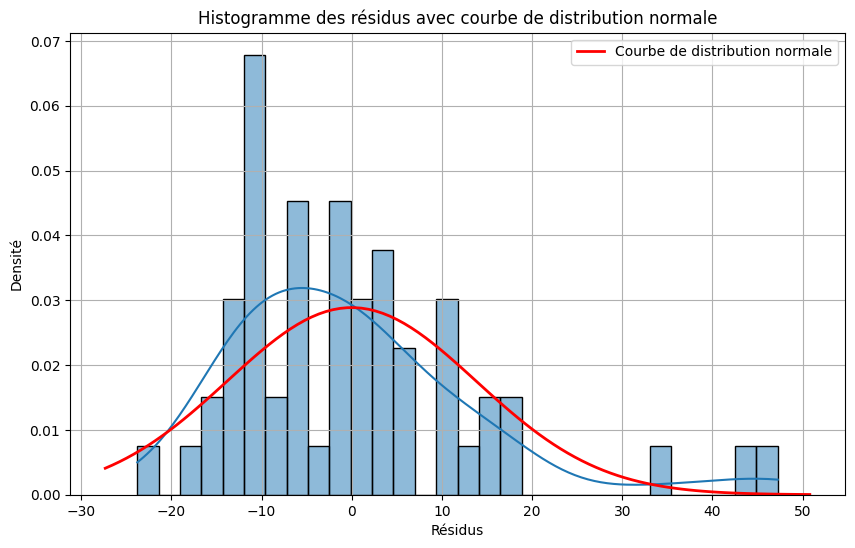

In [25]:
# Calculer les résidus
residus = model.resid

# Créer l'histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des résidus avec courbe de distribution normale')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

## Étape 9 : Calcul de l'Erreur quadratique moyenne (MSE).

In [26]:
from sklearn.metrics import mean_squared_error

# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Calculer l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Erreur Quadratique Moyenne (MSE): {mse}')

Erreur Quadratique Moyenne (MSE): 190.97597695181386


Dans notre cas, un MSE de 190,98 montre que le modèle présente une certaine marge d'erreur dans ses prédictions, ce qui peut être attribué à des facteurs comme la dispersion des données, l'hétéroscédasticité (comme identifié par le test de White), ou l'absence d'autres variables explicatives pertinentes.

## Étape 10 : Coefficient de détermination (R²).

In [27]:
# Coefficient de détermination (R²)
r_squared = model.rsquared
print(f'Coefficient de détermination (R²): {r_squared}')


Coefficient de détermination (R²): 0.05746359706993687


Le coefficient de détermination (R²) de 0,057 indique que seulement 5,7 % de la variabilité de la mortalité due aux maladies respiratoires est expliquée par la concentration de PM2.5 dans notre modèle. Cela suggère que la pollution de l'air (PM2.5) a un impact limité sur la mortalité dans notre dataset, ou que d'autres facteurs non inclus dans le modèle jouent un rôle majeur.

## Conclusion 

Nos analyses révèlent une relation positive entre la concentration de PM2.5 et la mortalité due aux maladies respiratoires, mais cette relation reste limitée, avec un (R²) de 5,7 %, indiquant que d'autres facteurs influencent fortement la mortalité. Le test de White met en évidence une hétéroscédasticité, suggérant une variabilité non constante des erreurs, tandis que le test de Durbin-Watson (2,09) confirme l'absence d'autocorrélation des résidus. Enfin, un MSE de 190,98 montre une marge d'erreur notable dans nos prédictions. Des ajustements ou l'inclusion de variables supplémentaires seraient nécessaires pour améliorer le modèle.

# Problématique :

Les dépenses de santé par individu sont essentielles pour évaluer l'efficacité des systèmes de santé. Les pays respectent-ils un seuil minimal de dépenses de santé par individu de 8 000 dollars par ans, comme recommandé par la référence internationale ?

# Test Hypothese

### Test t de student d'une echantillon :

# Étape 1 : Préparation des Données

#### Dépenses de santé et financement

Ce jeu de données examine les dépenses de santé et leur financement à l'échelle internationale. Il offre des informations comparables sur les flux financiers liés aux soins, organisées par fonctions, modes de prestation et mécanismes de financement. Grâce à des observations annuelles et des indicateurs comme les dépenses par individu (OBS_VALUE), il permet d’évaluer les systèmes de santé, de suivre les tendances et d’orienter les politiques publiques.

In [3]:
import pandas as pd
import requests
import io  # Import pour StringIO

# URL cible
url = f"https://sdmx.oecd.org/public/rest/data/OECD.ELS.HD,DSD_SHA@DF_SHA,1.0/DEU+AUS+AUT+BEL+CAN+CHL+COL+KOR+CRI+DNK+ESP+EST+USA+FIN+FRA+GRC+HUN+IRL+ISL+ISR+ITA+JPN+LVA+LTU+LUX+MEX+NOR+NZL+NLD+POL+PRT+SVK+GBR+SVN+SWE+CHE+CZE+TUR+ZAF+ARG+BGR+CHN+CYP+HRV+IND+IDN+MLT+PER+ROU+UKR.A.EXP_HEALTH.PT_B1GQ.HF1+_T.._T.._T...?startPeriod=2020&endPeriod=2020&dimensionAtObservation=AllDimensions"



# Ajouter un User-Agent pour simuler un navigateur
headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 


# Faire la requête GET
download = requests.get(url=url, headers=headers)

# Vérifier si la requête a réussi
if download.status_code == 200:
    # Lire le contenu CSV en DataFrame
    dfsante = pd.read_csv(io.StringIO(download.text))
    dfsante  # Afficher les premières lignes
else:
    print(f"Erreur: {download.status_code} - {download.reason}")

dfsante


,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,FINANCING_SCHEME,FINANCING_SCHEME_REV,FUNCTION,MODE_PROVISION,PROVIDER,...,PRICE_BASE,TIME_PERIOD,OBS_VALUE,BASE_PER,CURRENCY,OBS_STATUS,OBS_STATUS2,OBS_STATUS3,UNIT_MULT,DECIMALS
0,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),IRL,A,EXP_HEALTH,PT_B1GQ,_T,_Z,_T,_T,_T,...,_Z,2020,7.063,NaN,NaN,NaN,NaN,NaN,0,1
1,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),CHN,A,EXP_HEALTH,PT_B1GQ,_T,_Z,_T,_T,_T,...,_Z,2020,5.660,NaN,NaN,NaN,NaN,NaN,0,1
2,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),NOR,A,EXP_HEALTH,PT_B1GQ,HF1,_Z,_T,_T,_T,...,_Z,2020,9.821,NaN,NaN,NaN,NaN,NaN,0,1
3,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),MLT,A,EXP_HEALTH,PT_B1GQ,HF1,_Z,_T,_T,_T,...,_Z,2020,7.163,NaN,NaN,NaN,NaN,NaN,0,1
4,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),SVK,A,EXP_HEALTH,PT_B1GQ,_T,_Z,_T,_T,_T,...,_Z,2020,7.126,NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),MEX,A,EXP_HEALTH,PT_B1GQ,_T,_Z,_T,_T,_T,...,_Z,2020,6.054,NaN,NaN,NaN,NaN,NaN,0,1
96,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),EST,A,EXP_HEALTH,PT_B1GQ,HF1,_Z,_T,_T,_T,...,_Z,2020,5.851,NaN,NaN,NaN,NaN,NaN,0,1
97,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),HUN,A,EXP_HEALTH,PT_B1GQ,HF1,_Z,_T,_T,_T,...,_Z,2020,5.157,NaN,NaN,NaN,NaN,NaN,0,1
98,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),SVN,A,EXP_HEALTH,PT_B1GQ,HF1,_Z,_T,_T,_T,...,_Z,2020,6.898,NaN,NaN,NaN,NaN,NaN,0,1


### nettoyage de donner:

##### Étape 1 : Exploration initiale

In [5]:
# Afficher des informations sur les colonnes, types de données et valeurs manquantes
dfsante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATAFLOW              100 non-null    object 
 1   REF_AREA              100 non-null    object 
 2   FREQ                  100 non-null    object 
 3   MEASURE               100 non-null    object 
 4   UNIT_MEASURE          100 non-null    object 
 5   FINANCING_SCHEME      100 non-null    object 
 6   FINANCING_SCHEME_REV  100 non-null    object 
 7   FUNCTION              100 non-null    object 
 8   MODE_PROVISION        100 non-null    object 
 9   PROVIDER              100 non-null    object 
 10  FACTOR_PROVISION      100 non-null    object 
 11  ASSET_TYPE            100 non-null    object 
 12  PRICE_BASE            100 non-null    object 
 13  TIME_PERIOD           100 non-null    int64  
 14  OBS_VALUE             100 non-null    float64
 15  BASE_PER              0 

##### Étape 2 : Exploration initiale

In [7]:
# Liste des colonnes à supprimer
columns_to_drop = ['DATAFLOW','PRICE_BASE','ASSET_TYPE','FACTOR_PROVISION','PROVIDER','MODE_PROVISION','FUNCTION','FINANCING_SCHEME_REV','FINANCING_SCHEME','FREQ','BASE_PER', 'CURRENCY', 'OBS_STATUS', 'OBS_STATUS2', 'OBS_STATUS3', 'UNIT_MULT', 'DECIMALS']

# Supprimer les colonnes non pertinentes
dfsante_cleaned = dfsante.drop(columns=columns_to_drop)

# Vérifier les modifications
dfsante_cleaned.head()

,REF_AREA,MEASURE,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE
0,IRL,EXP_HEALTH,PT_B1GQ,2020,7.063
1,CHN,EXP_HEALTH,PT_B1GQ,2020,5.660
2,NOR,EXP_HEALTH,PT_B1GQ,2020,9.821
3,MLT,EXP_HEALTH,PT_B1GQ,2020,7.163
4,SVK,EXP_HEALTH,PT_B1GQ,2020,7.126


##### Étape 3 : Renommer les colonnes pertinentes

In [8]:
# Renommer les colonnes pertinentes
dfsante_cleaned = dfsante_cleaned.rename(columns={
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Health Expenditure',
    'REF_AREA': 'Country'
})

# Vérifier les modifications
dfsante_cleaned.head()


,Country,MEASURE,UNIT_MEASURE,Year,Health Expenditure
0,IRL,EXP_HEALTH,PT_B1GQ,2020,7.063
1,CHN,EXP_HEALTH,PT_B1GQ,2020,5.660
2,NOR,EXP_HEALTH,PT_B1GQ,2020,9.821
3,MLT,EXP_HEALTH,PT_B1GQ,2020,7.163
4,SVK,EXP_HEALTH,PT_B1GQ,2020,7.126


##### Étape 4 : Gestion des valeurs manquantes

In [9]:
# Supprimer les lignes avec des valeurs manquantes
dfsante_cleaned = dfsante_cleaned.dropna()

##### Étape 5 : Filtrage des données

In [10]:
# Filtrer pour ne garder que les valeurs positives
dfsante_cleaned = dfsante_cleaned[dfsante_cleaned['Health Expenditure'] > 0]

# Vérifier les modifications
dfsante_cleaned.head()

,Country,MEASURE,UNIT_MEASURE,Year,Health Expenditure
0,IRL,EXP_HEALTH,PT_B1GQ,2020,7.063
1,CHN,EXP_HEALTH,PT_B1GQ,2020,5.660
2,NOR,EXP_HEALTH,PT_B1GQ,2020,9.821
3,MLT,EXP_HEALTH,PT_B1GQ,2020,7.163
4,SVK,EXP_HEALTH,PT_B1GQ,2020,7.126


##### Étape 6 : Suppression des doublons

In [11]:
# Supprimer les doublons
dfsante_cleaned = dfsante_cleaned.drop_duplicates()

# Vérifier les modifications
dfsante_cleaned

,Country,MEASURE,UNIT_MEASURE,Year,Health Expenditure
0,IRL,EXP_HEALTH,PT_B1GQ,2020,7.063
1,CHN,EXP_HEALTH,PT_B1GQ,2020,5.660
2,NOR,EXP_HEALTH,PT_B1GQ,2020,9.821
3,MLT,EXP_HEALTH,PT_B1GQ,2020,7.163
4,SVK,EXP_HEALTH,PT_B1GQ,2020,7.126
...,...,...,...,...,...
95,MEX,EXP_HEALTH,PT_B1GQ,2020,6.054
96,EST,EXP_HEALTH,PT_B1GQ,2020,5.851
97,HUN,EXP_HEALTH,PT_B1GQ,2020,5.157
98,SVN,EXP_HEALTH,PT_B1GQ,2020,6.898


# Étape 2 : Application de Test t de Student

### Conditions pour le test t de student :

##### Étape 1 : Taille de l'échantillon :

In [12]:
# Vous pouvez maintenant l'utiliser à nouveau
taille = len(dfsante_cleaned)
print(taille)

100


Interpretation: puisque la taille plus grand 30 donc condition verifier

##### Étape 2 : Vérifier la normalité des données

In [14]:
from scipy.stats import shapiro

# Vérifier les valeurs manquantes et les supprimer (si nécessaire)
df_clean = dfsante_cleaned.dropna(subset=['Health Expenditure'])

# Extraire la colonne 'OBS_VALUE' pour le test de Shapiro
data = dfsante_cleaned['Health Expenditure']

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(data)

# Afficher les résultats
print('Statistique de Shapiro-Wilk:', stat)
print('P-value:', p_value)

# Interprétation du test
if p_value > 0.05:
    print("Les données suivent une distribution normale (p > 0.05)")
else:
    print("Les données ne suivent pas une distribution normale (p <= 0.05)")

Statistique de Shapiro-Wilk: 0.9808930938773731
P-value: 0.155939509583491
Les données suivent une distribution normale (p > 0.05)


#### Interprétation :
##### Statistique de Shapiro-Wilk (0.9809) : 
La valeur proche de 1 indique que les données sont bien ajustées à une distribution normale.

##### P-value (0.1559) : 
Étant supérieure à 0.05, elle confirme que Les données suivent une distribution normale.

##### Étape 1 : Taille de l'échantillon :

### Formulation de l'hypothèse :

##### Hypothèse nulle (H₀) : 
La moyenne des dépenses de santé de echantillon est inférieure ou égale à la valeur de référence Health_Expenditure_Reference = 8.000 dollars.

##### Hypothèse alternative (H₁) :
La moyenne des dépenses de santé est strictement supérieure à la valeur de référence Health_Expenditure_Reference = 8.000 dollars.

### Test et Interpretation :

**Health_Expenditure_Reference** : Référence mondiale pour les dépenses de santé, utilisée pour comparer les données locales.  
**Test t de Student** : Test statistique pour vérifier si les dépenses de santé de l'échantillon diffèrent significativement de la référence mondiale.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp

# Référence mondiale pour les dépenses de santé (par exemple, moyenne globale)
Health_Expenditure_Reference = 8.000

# Effectuer un test t pour comparer les dépenses de santé à la référence mondiale
stat, p_value = ttest_1samp(dfsante_cleaned["Health Expenditure"], Health_Expenditure_Reference)

In [19]:
# Calculer la p-valeur unilatérale
if stat > 0:  # Vérifier si t est dans la direction de H1 (test unilatéral à droite)
    p_value = p_value / 2
else:  # Si t est négatif, ajuster la p-valeur pour un test unilatéral à gauche
    p_value = 1 - (p_value / 2)

# Utiliser la valeur absolue de la statistique t pour éviter les signes négatifs
stat = abs(stat)

# Afficher les résultats
print("Statistique t :", stat)
print("P-valeur:", p_value)

Statistique t : 0.33543809654749873
P-valeur: 0.31549889576704304


Interprétation :
Statistique t : La statistique t est de 0.3354, ce qui indique que la moyenne de votre échantillon est très proche de la valeur de référence. Plus cette statistique est proche de 0, plus cela suggère que l'échantillon n'est pas significativement différent de la valeur de référence.

P-valeur : La p-valeur de 0.6310 est bien supérieure à 0.05 . Cela signifie que la probabilité d'obtenir une statistique t aussi extrême que celle observée, sous l'hypothèse nulle, est élevée. En d'autres termes, les données observées sont compatibles avec l'hypothèse nulle.

In [17]:
alpha = 0.05 # On fixe le seuil de signification à 5%

if p_value > alpha:
    print('On accepte H0  : La moyenne des dépenses de santé de echantillon est inférieure ou égale à la valeur de référence Health_Expenditure_Reference = 8.000$.')
else:
    print('On accepte H1 : La moyenne des dépenses de santé est strictement supérieure à la valeur de référence Health_Expenditure_Reference = 8.000$.')

On accepte H0  : La moyenne des dépenses de santé de echantillon est inférieure ou égale à la valeur de référence Health_Expenditure_Reference = 8.000$.


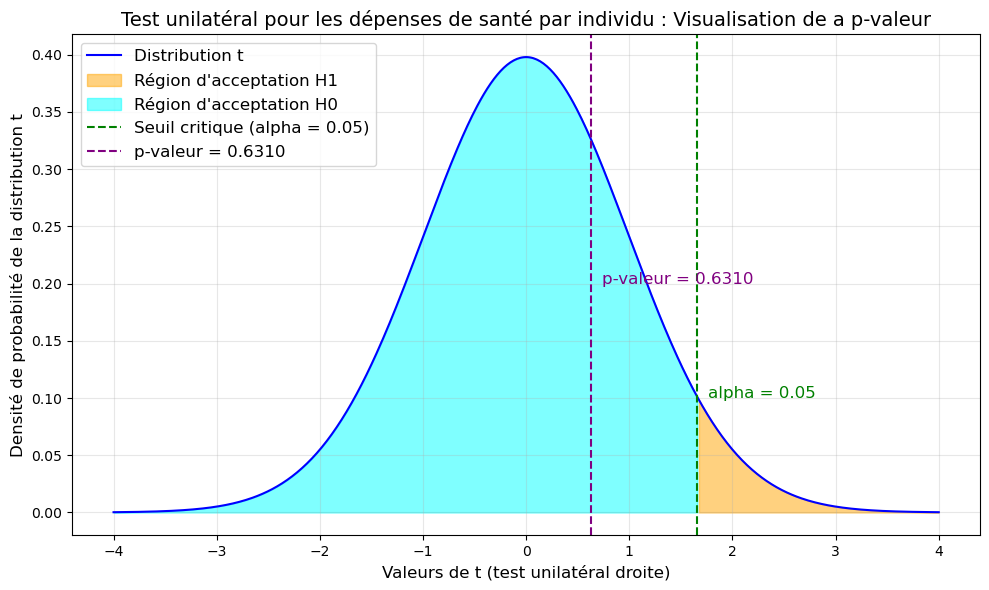

In [18]:
# Visualisation : Distribution t
df = len(dfsante_cleaned) - 1  # Degrés de liberté
x = np.linspace(-4, 4, 500)  # Valeurs pour la courbe t
y = t.pdf(x, df)  # Densité de probabilité pour la distribution t

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer la courbe t
plt.plot(x, y, label="Distribution t", color="blue")

# Remplir les zones H0 et H1
critical_value = t.ppf(1 - alpha, df)
plt.fill_between(x, 0, y, where=(x > critical_value), color='orange', alpha=0.5, label="Région d'acceptation H1")
plt.fill_between(x, 0, y, where=(x <= critical_value), color='cyan', alpha=0.5, label="Région d'acceptation H0")

# Ajouter le seuil critique pour un test unilatéral
plt.axvline(critical_value, color="green", linestyle="--", label=f"Seuil critique (alpha = {alpha:.2f})")

# Ajouter une ligne pour la p-valeur
plt.axvline(p_value, color="purple", linestyle="--", label=f"p-valeur = {p_value:.4f}")

# Annoter alpha et p-valeur
plt.text(critical_value + 0.1, 0.1, f"alpha = {alpha:.2f}", color="green", fontsize=12)
plt.text(p_value + 0.1, 0.2, f"p-valeur = {p_value:.4f}", color="purple", fontsize=12)

# Ajouter des titres et des légendes adaptés à votre cas
plt.title("Test unilatéral pour les dépenses de santé par individu : Visualisation de a p-valeur", fontsize=14)
plt.xlabel("Valeurs de t (test unilatéral droite)", fontsize=12)
plt.ylabel("Densité de probabilité de la distribution t", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Afficher la figure
plt.tight_layout()
plt.show()

#### Interprétation:
- La p-valeur est de 0.6310, ce qui est bien supérieur à 0.05.
- Cela signifie que nous acceptons l'hypothèse H0(La moyenne des dépenses de santé de echantillon est inférieure ou égale à la valeur de référence Health_Expenditure_Reference = 8.000$).
- La zone cyan représente la région d'acceptation de H0, où la p-valeur est supérieure à alpha.
- La zone orange représente la région d'acceptation de H1, où la p-valeur est inférieure à alpha.

#### Conclusion :
Les résultats du test montrent que la p-valeur est bien supérieure à alpha (0.05), ce qui signifie que nous acceptons l'hypothèse nulle (H0). En d'autres termes, la moyenne des dépenses de santé dans l'échantillon est inférieure ou égale à la valeur de référence de 8 000 dollars.

#### Réponse à la problématique :
Cela signifie que les pays de l'échantillon ne respectent pas toujours la moyenne minimale de dépenses de santé par individu, supérieure à 8 000 dollars par an, selon la référence internationale.

# Partie 2 : Tests non Paramétriques 

## Préparation des Données

Cette base contient des indicateurs de santé et environnementaux au niveau territorial pour différentes régions et pays. Les données incluent des mesures liées à la pollution de l'air et à des ratios de mortalité, permettant des analyses sur les risques environnementaux et leurs impacts sur la santé.

In [10]:
import pandas as pd
import requests
import io  # Import pour StringIO

# URL cible
#url = f"https://sdmx.oecd.org/public/rest/data/OECD.ENV.EPI,DSD_AIR_POL@DF_AIR_POLL,1.0/AUT+AUS+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+AU1+AU2+AU3+AU4+AU5+AU6+AU7+AU8+G7+G20+EA20+EU27_2020+OECD+OECDA+OECDSO+OECDE+AES+EMES+IPAC+W+A9.A.MEAN_POP....?startPeriod=2020&dimensionAtObservation=AllDimensions"
url = f"https://sdmx.oecd.org/public/rest/data/OECD.CFE.EDS,DSD_REG_HEALTH@DF_RISK,2.0/A..AUS+AU1+AU2+AU3+AU4+AU5+AU6+AU7+AU8+AUT+AT11+AT111+AT112+AT113+AT12+AT121+AT122+AT123+AT124+AT125+AT126+AT127+AT13+AT130+AT21+AT211+AT212+AT213+AT22+AT221+AT222+AT223+AT224+AT225+AT226+AT31+AT311+AT312+AT313+AT314+AT315+AT32+AT321+AT322+AT323+AT33+AT331+AT332+AT333+AT334+AT335+AT34+AT341+AT342..MORT_ICDJ_CRUDE_RATIO+PM25_POP_EXP...?startPeriod=2018&endPeriod=2018&dimensionAtObservation=AllDimensions"
# url = f"https://sdmx.oecd.org/public/rest/data/OECD.CFE.EDS,DSD_REG_HEALTH@DF_RISK,2.0/A.TL2...MORT_ICDJ_CRUDE_RATIO+PM25_POP_EXP...?startPeriod=2015&endPeriod=2015&dimensionAtObservation=AllDimensions"
# Ajouter un User-Agent pour simuler un navigateur
headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 


# Faire la requête GET
download = requests.get(url=url, headers=headers)

# Vérifier si la requête a réussi
if download.status_code == 200:
    # Lire le contenu CSV en DataFrame
    dfpol = pd.read_csv(io.StringIO(download.text))
    dfpol  # Afficher les premières lignes
else:
    print(f"Erreur: {download.status_code} - {download.reason}")

dfpol

,DATAFLOW,FREQ,TERRITORIAL_LEVEL,REF_AREA,TERRITORIAL_TYPE,MEASURE,AGE,SEX,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,COUNTRY,OBS_STATUS,UNIT_MULT,DECIMALS
0,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL2,AU1,_Z,MORT_ICDJ_CRUDE_RATIO,_T,_T,10P5HB,2018,46.60,AUS,A,0,2
1,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL2,AU1,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,7.90,AUS,A,0,1
2,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL2,AU2,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,8.10,AUS,A,0,1
3,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL2,AU6,_Z,MORT_ICDJ_CRUDE_RATIO,_T,_T,10P5HB,2018,48.50,AUS,A,0,2
4,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL2,AU2,_Z,MORT_ICDJ_CRUDE_RATIO,_T,_T,10P5HB,2018,42.00,AUS,A,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL3,AT312,_Z,MORT_ICDJ_CRUDE_RATIO,_T,_T,10P5HB,2018,71.44,AUT,A,0,2
102,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL3,AT130,_Z,PM25_POP_EXP,_Z,_Z,MCG_M3,2018,14.40,AUT,A,0,1
103,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL3,AT334,_Z,MORT_ICDJ_CRUDE_RATIO,_T,_T,10P5HB,2018,49.05,AUT,A,0,2
104,OECD.CFE.EDS:DSD_REG_HEALTH@DF_RISK(2.0),A,TL2,AU8,_Z,MORT_ICDJ_CRUDE_RATIO,_T,_T,10P5HB,2018,44.50,AUS,A,0,2


### Test de Wilcoxon 

 Tester si les différences entre les deux mesures pour chaque région sont symétriques autour de zéro.
 nous comparerons les valeurs de pollution de l'air ***PM25_POP_EXP*** et les ratios de mortalité ***MORT_ICDJ_CRUDE_RATIO*** pour les mêmes régions

### Hypothèse nulle (𝐻0) :

Il n'y a pas de différence significative entre les niveaux de pollution et les ratios de mortalité pour les régions étudiées.
### Hypothèse alternative (𝐻𝑎) :
Il y a une différence significative entre ces deux mesures.

In [16]:
import pandas as pd
from scipy import stats
from scipy.stats import wilcoxon


# Restructurer les données pour obtenir des paires
pivot_data = dfpol.pivot(index='REF_AREA', columns='MEASURE', values='OBS_VALUE')
paired_data = pivot_data.dropna()
# print(paired_data)

# Récupérer les listes de données appariées
mortality_ratios = list(paired_data['MORT_ICDJ_CRUDE_RATIO'])
pollution_levels = list(paired_data['PM25_POP_EXP'])
# print(mortality_ratios)
# print(pollution_levels)

# Appliquer le test de Wilcoxon apparié
w_stat, p_value = stats.wilcoxon(pollution_levels, mortality_ratios)

# Fixer le seuil de signification
alpha = 0.05
print("p_valeur =", p_value)

# Conclusion du test
if p_value > alpha:
    print("On accepte H0 : Il n'y a pas de différence significative entre les niveaux de pollution et les ratios de mortalité pour les régions étudiées.")
else:
    print("On rejette H0 : Il y a une différence significative entre ces deux mesures.")

p_valeur = 3.501668345141214e-10
On rejette H0 : Il y a une différence significative entre ces deux mesures.


### Test de Mann-Whitney 

Dans ce cas, nous comparons les niveaux de pollution ***PM25_POP_EXP*** entre deux groupes : des régions avec un ratio de mortalité élevé (>45) et des régions avec un ratio de mortalité bas (≤45).


***H0***: Les deux groupes ont des distributions similaires (pas de différence significative).

***𝐻𝑎***: Les deux groupes ont des distributions différentes (différence significative).

In [22]:
import pandas as pd
import scipy.stats as stats

# Filtrer les données selon les mesures
mortality_data = dfpol[dfpol['MEASURE'] == 'MORT_ICDJ_CRUDE_RATIO']
pollution_data = dfpol[dfpol['MEASURE'] == 'PM25_POP_EXP']
# Ajouter une colonne pour la catégorisation
mortality_data['HIGH_MORTALITY'] = mortality_data['OBS_VALUE'] > 45


# Faire correspondre les régions avec les mesures de pollution
pollution_data = pollution_data.merge(mortality_data[['REF_AREA', 'HIGH_MORTALITY']], on='REF_AREA', how='left')
# Diviser les données en deux groupes selon le ratio de mortalité
high_mortality_pollution = list(pollution_data[pollution_data['HIGH_MORTALITY'] == True]['OBS_VALUE'])
low_mortality_pollution = list(pollution_data[pollution_data['HIGH_MORTALITY'] == False]['OBS_VALUE'])

# Effectuer le test de Mann-Whitney
u_statistic, p_value = stats.mannwhitneyu(high_mortality_pollution, low_mortality_pollution)

# Fixer le seuil de signification
alpha = 0.05
print("p_valeur =", p_value)

# Conclusion du test
if p_value > alpha:
    print("On accepte H0 : Il n'y a pas de différence significative entre les deux groupes.")
else:
    print("On rejette H0 : Il existe une différence significative entre les deux groupes.")


p_valeur = 0.010715156002045716
On rejette H0 : Il existe une différence significative entre les deux groupes.


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_21348\3207801054.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['HIGH_MORTALITY'] = mortality_data['OBS_VALUE'] > 45


### Test Chi-Carré d'indépendance

 Tester s'il existe une relation significative entre le type de mesure ***pollution vs mortalité*** et la région ***REF_AREA***.

***H0*** : Le pays et le type de mesure sont indépendants (pas de relation significative).

***𝐻𝑎*** : Le pays et le type de mesure ne sont pas indépendants (relation significative).

In [31]:
import pandas as pd
import scipy.stats as stats

# Créer un tableau de contingence entre les types de mesures et les régions
contingency_table = pd.crosstab(dfpol['COUNTRY'], dfpol['MEASURE'])
print('Tableau de contingence :\n', contingency_table)

# Effectuer le test du Chi-Carré d'indépendance
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Afficher les résultats
# print("\nFréquences attendues: \n", expected)
print("Statistique du Chi-Carré: ", chi2)
print("Valeur p: ", p)
print("Degré de liberté: ", dof)

# Fixer le seuil de signification
alpha = 0.05
if p < alpha:
    print("\nOn rejette H0. Il y a une relation significative entre le pays et le type de mesure.")
else:
    print("\nOn accepte H0. Aucune relation significative entre le pays et le type de mesure.")


Tableau de contingence :
 MEASURE  MORT_ICDJ_CRUDE_RATIO  PM25_POP_EXP
COUNTRY                                     
AUS                          9             8
AUT                         45            44
Statistique du Chi-Carré:  0.0
Valeur p:  1.0
Degré de liberté:  1

On accepte H0. Aucune relation significative entre le pays et le type de mesure.
